# 建立Neo4j链接

In [1]:
!pip install neo4j pyahocorasick numpy pandas --no-warn-script-location

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 15.0/15.0 MB 21.1 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, which is not installed.
tensorboard 2.12.2 requires protobuf>=3.19.6, which is not installed.
peft 0.4.0.dev0 requires transformers, which is not installed.
flexgen 0.1.7 requires transformers>=4.24, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


## 定义数据操作对象

In [2]:
from neo4j_driver import Neo4jConnection, Node

## 链接并查看节点数量

In [3]:
conn = Neo4jConnection('neo4j://localhost:7687/', 'neo4j', 'Lorne@2022')

In [4]:
conn.create(Node("Person", name="Alice", age=30))
conn.create(Node("Person", name="Bob", age=30))
conn.create(Node("Person", name="Charlie", age=30))

In [5]:
print("数据库中的节点总数：", conn.counts())

数据库中的节点总数： 3


### 创建所有关系

In [6]:
# 创建关系
edges = [('Alice', 'Bob'), ('Alice', 'Charlie')]
conn.relationship('Person', 'Person', edges, 'KNOWS', 'friend')

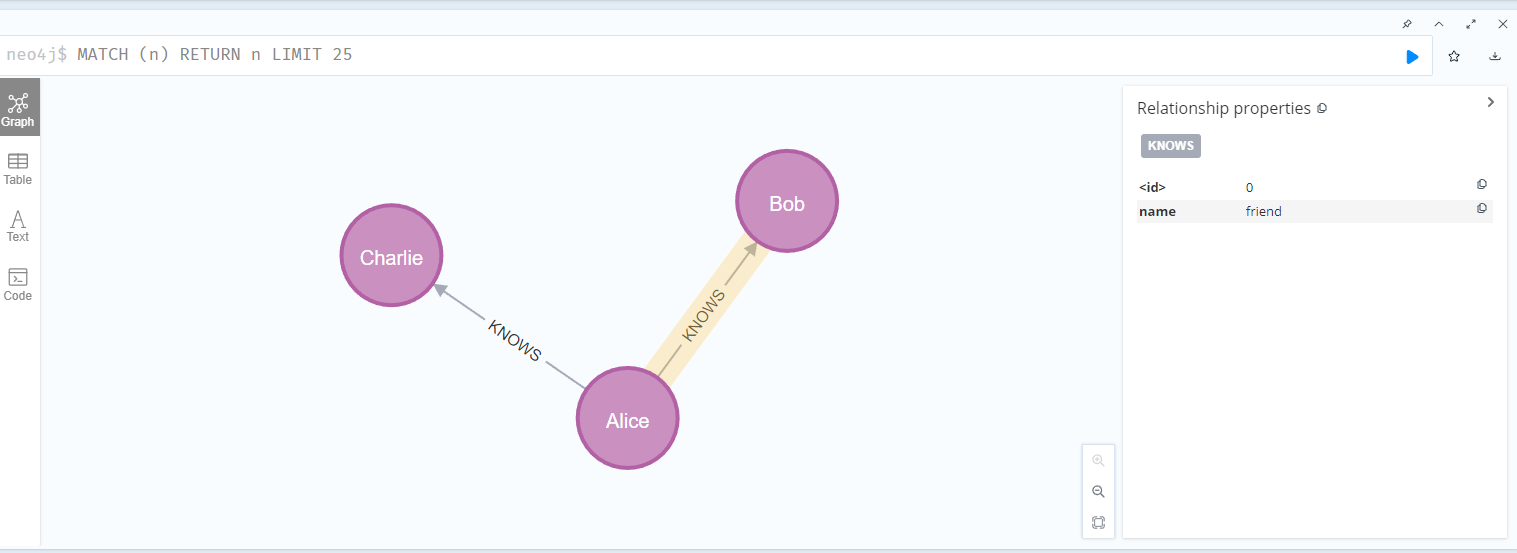

## 清空所有的数据

In [7]:
conn.clear()